# Machine Learning with Python

We now have our data. We have sanitized it into a csv format. We have explored it.

Now lets try to predict some properties.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
## Load the data
# df = pd.read_csv('../data/mpdata.csv')
df = pd.read_csv('https://gitlab.com/costrouc/mse-machinelearning-notebooks/raw/master/data/mpdata.csv')

In [3]:
df.sample(5)

,material_id,energy,volume,nsites,energy_per_atom,pretty_formula,spacegroup,band_gap,density,total_magnetization,poisson_ratio,bulk_modulus_voigt,bulk_modulus_reuss,bulk_modulus_vrh,shear_modulus_voigt,shear_modulus_vrh
2621,mp-559777,-372.248991,732.106016,56,-6.647303,Na5Ca2Al(PO4)4,9,4.6496,2.730746,-8.000000e-07,NaN,NaN,NaN,NaN,NaN,NaN
4063,mp-603327,-355.351207,654.019374,64,-5.552363,H3SNO3,61,5.1885,1.972148,1.312010e-02,NaN,NaN,NaN,NaN,NaN,NaN
5443,mp-559382,-17.053707,33.482124,3,-5.684569,CoO2,164,0.0000,4.509754,9.997688e-01,NaN,NaN,NaN,NaN,NaN,NaN
4616,mp-558564,-281.494573,681.185211,36,-7.819294,SiO2,12,5.5113,1.757625,-1.510000e-05,NaN,NaN,NaN,NaN,NaN,NaN
2883,mp-667374,-1188.876440,2214.927434,168,-7.076645,NaAlSiO4,169,4.5414,2.555969,1.502800e-03,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.corr()

,energy,volume,nsites,energy_per_atom,spacegroup,band_gap,density,total_magnetization,poisson_ratio,bulk_modulus_voigt,bulk_modulus_reuss,bulk_modulus_vrh,shear_modulus_voigt,shear_modulus_vrh
energy,1.000000,-0.852020,-0.965198,0.345171,0.176241,-0.378738,0.185483,-0.121921,0.045966,-0.080688,-0.059895,-0.071393,-0.128289,-0.056726
volume,-0.852020,1.000000,0.862495,-0.110264,-0.162344,0.302136,-0.309343,0.034127,0.000059,-0.208067,-0.187330,-0.201073,-0.110852,-0.052474
nsites,-0.965198,0.862495,1.000000,-0.194668,-0.217266,0.371992,-0.248281,0.095329,-0.032862,-0.032160,-0.028786,-0.030992,0.042327,0.017493
energy_per_atom,0.345171,-0.110264,-0.194668,1.000000,-0.038482,-0.221015,-0.334075,-0.171508,0.051704,-0.565429,-0.465262,-0.523804,-0.434698,-0.211633
spacegroup,0.176241,-0.162344,-0.217266,-0.038482,1.000000,-0.093678,0.250417,-0.065560,0.028444,0.195654,0.205996,0.204483,0.113808,0.058407
band_gap,-0.378738,0.302136,0.371992,-0.221015,-0.093678,1.000000,-0.421409,-0.220998,-0.068310,-0.266141,-0.249368,-0.262229,-0.036694,0.000743
density,0.185483,-0.309343,-0.248281,-0.334075,0.250417,-0.421409,1.000000,0.322121,0.065513,0.501874,0.538017,0.529485,0.165460,0.086553
total_magnetization,-0.121921,0.034127,0.095329,-0.171508,-0.065560,-0.220998,0.322121,1.000000,0.023007,0.080165,0.089585,0.086458,-0.006023,-0.031027
poisson_ratio,0.045966,0.000059,-0.032862,0.051704,0.028444,-0.068310,0.065513,0.023007,1.000000,-0.019499,-0.022243,-0.021264,-0.143481,0.082642
bulk_modulus_voigt,-0.080688,-0.208067,-0.032160,-0.565429,0.195654,-0.266141,0.501874,0.080165,-0.019499,1.000000,0.930499,0.981958,0.676028,0.325090


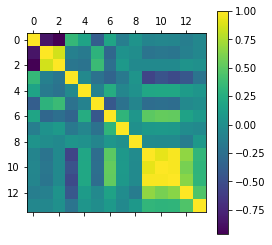

In [5]:
plt.matshow(df.corr())
plt.colorbar()

# Lets choose a very simple example to show methodology

How about we try to predict the `energy_per_atom`. You can see from the correlation plot that there are two very highly correlated values in purple.

We will simplify our model and only use the first four columns. Obviously `volume` is not usefull in the calculation but we want to see if our algorithm can automatically determine this.

In [6]:
simplified_df = df[['energy', 'volume', 'nsites', 'energy_per_atom']]

In [7]:
simplified_df.head(5)

,energy,volume,nsites,energy_per_atom
0,-4.064600,11.852765,1,-4.064600
1,-16.382096,47.264158,4,-4.095524
2,-8.186959,23.617388,2,-4.093479
3,-4.064142,11.874703,1,-4.064142
4,-2.157191,603.475210,1,-2.157191


All (99%) of machine learning algoritms need the data as arrays of floating point numbers. Scikit learn is no different. This is how easy it is to convery a pandas dataframe from a numpy array.

Not covered here but you most likely will need it at one point [preprocessing data](http://scikit-learn.org/stable/modules/preprocessing.html) and how to handle categorical data.

In [8]:
# convert from pandas dataframe to numpy array
X = simplified_df[['energy', 'volume', 'nsites']].values
y = simplified_df['energy_per_atom'].values

print(X.shape, y.shape)
print(X[:3], y[:3])

(6928, 3) (6928,)
[[ -4.0645998   11.85276501   1.        ]
 [-16.38209642  47.26415795   4.        ]
 [ -8.18695876  23.61738783   2.        ]] [-4.0645998  -4.0955241  -4.09347938]


## Scikit Learn

Very quick overview. [Scikit](http://scikit-learn.org/stable/) learn provides a unified framework for working with machine learning algorithms. It includes classification, regression, clustering, dimensionality reduction, model tuning, pre and post processing of data.

Is that a lot? **YES** scikit learn is huge and you cannot expect to use and learn everything.

The flow chart gives some good advice for which algorithms to use for your problem. See their [flow chart](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

![sklearn flowchart](../images/scklearn-flowchart.png)

There are a ton of algoritms over 100! This is where sklearn really shines. All algorithms have the exact same api (this is the pseudocode).

```python
from sklearn import MyImportantModel

model = MyImportantModel()
model.fit(X, y)
```

Once you have `fit` your model you can using is to predict future data.

```python
y_predict = model.predict(X_predict)
```

We will be using a linear model to fit our data. Always start with the simplest model! That way you know what sort of improvement a complex one can get you.

[sklearn.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [9]:
# Lets use a simple linear model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

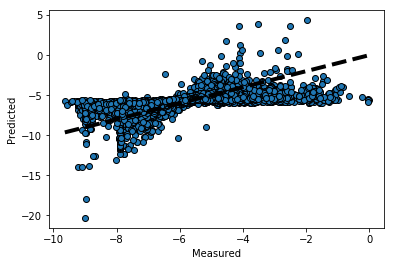

In [10]:
from sklearn.model_selection import cross_val_predict

predicted =  cross_val_predict(model, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [13]:
# lest do the cross validation by hand
import sklearn

In [14]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
y_predict = model.predict(X_test)

# calculate mean square error
sklearn.metrics.mean_squared_error(y_test, y_predict)

1.5827284267819932